# (A) ANOMALY DETECTION 

- Sensor prototypes deployed under potentially harsh weather conditions for tasks like environmental forecasting are prone to breakage and damage.
- KMeans is a Clustering based – Unsupervised machine learning technique used to identify clusters of data objects in a dataset. 
- Among many clustering methods, KMeans is one of the oldest and most approachable. These trait makes KMeans implementation in Python easy and straightforward.

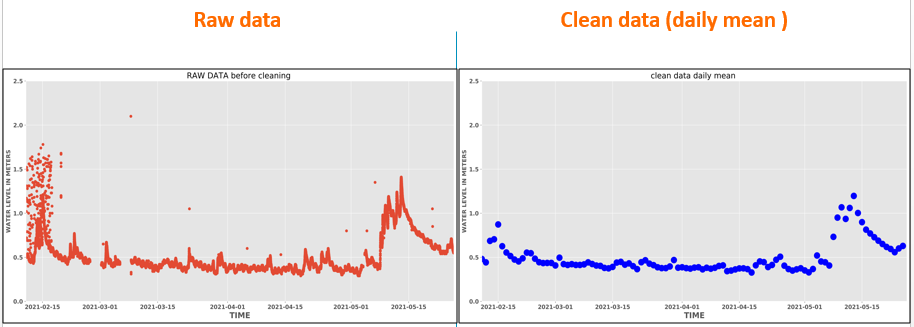

## (2) BREAKDOWN
- We will import a section of the dataset streaming in. (prepared sample)
- Extract data from a single day(at random)(make sure there are anomalie)
- Use KMEANS to perform the anomaly detection
- Calculate the daily mean

## (3) Lets dive in!!!! 

## Anomaly detection using Kmeans from scikit-learn

###  1. Import the necessary packages 

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd
from datetime import datetime, timedelta
plt.rcParams['figure.figsize'] = (18, 9)

### 2. Import the dataset and visualize it
This is Water Level data collected between the 11th of February 2021 and 25th of February 2021. It is an interesting piece data I have been collecting from one of the water_level sensors along River Muringato in Nyeri- Kenya

<function matplotlib.pyplot.show(*args, **kw)>

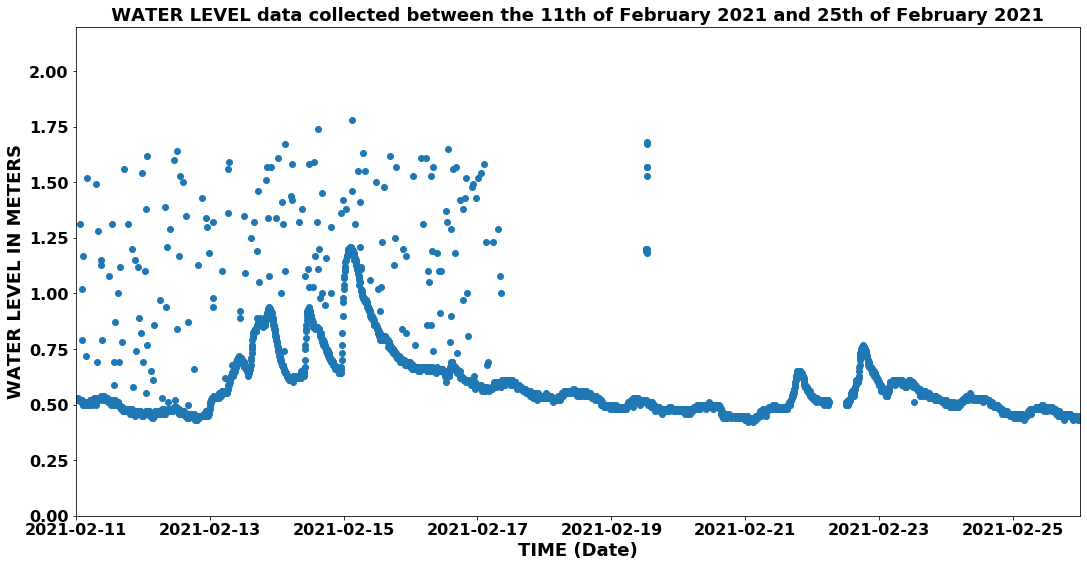

In [7]:
df = pd.read_csv('data/sample_dataset_waterlevel.csv')
df[['time']] = df[['time']].apply(pd.to_datetime)
plt.scatter(df['time'],df['Data'])
plt.title(' WATER LEVEL data collected between the 11th of February 2021 and 25th of February 2021 ',weight = 'bold', fontsize=18)
plt.xlabel('TIME (Date)', fontsize=18, weight = 'bold')
plt.ylabel('WATER LEVEL IN METERS', fontsize=18, weight = 'bold')
plt.xlim(['2021-02-11 00:00:00'],['2021-02-25 23:59:59'])
plt.ylim(0, 2.2)
plt.xticks(fontsize=16, weight = 'bold')
plt.yticks(fontsize=16, weight = 'bold')
plt.rcParams['figure.figsize'] = (18, 9)
plt.show

### 3. spoting the anomalies
- On the Scatter plot above you can spot the anomalies on the first half. This anomalies were brought about by prototype mul-function after it was first depoyed.
- In the next couple of cells we will try to eliminate the anomalies using Kmeans
- Kmeans is basically a clustering algorithm that is used to find groups in data /cluster data which have not been explicitly labeled.
- After clustering, the desire clusters can be retained while the undesired are being scrapped off.

### 4. Clustering the whole dataset 

##  silhouette_score 

- used to evaluate the optimum number of clusters needed for a particular dataset
- The value of the silhouette coefﬁcient is between [-1, 1]. 
- A score of 1 denotes the best meaning that the data point is very compact within the cluster to which it belongs and far away   from the other clusters.
- The worst value is -1. 
- Values near 0 denote overlapping clusters.

- silhouette_score formula : $$ S(\alpha) = \frac{b(\alpha)- a(\alpha)}{max[a(\alpha)- b(\alpha)]} \\ $$

where,
- $S(\alpha)$ is the silhouette coefficient of the data point $\alpha$
- $a(\alpha)$ is the average distance between $\alpha$ and all the other data points in the cluster to which $\alpha$ belongs
- $b(\alpha)$ is the minimum average distance from $\alpha$ to all clusters to which $\alpha$ does not belong

In [8]:
# silhouette_score is used to evaluate the optimum number of clusters needed for a particular dataset
water_level_array = np.array(df['Data']).reshape(-1, 1) # convert the dataframe column to an array and reshape it.
from sklearn.metrics import silhouette_samples, silhouette_score # import silhouette_samples, silhouette_score 
kmax = 10 # set the maximum number of clusters - running iterations
for k in range(2, kmax+1): # for loop to run the iterations and spit out the results
    kmeans = KMeans(n_clusters= k).fit(water_level_array) # Fitting the dataset in Kmeans 
    labels = kmeans.labels_ #Production of cluster labels
    silhouette_avg = silhouette_score(water_level_array, labels, metric = 'euclidean') # euclidean distance from the centre 
    print("For k_clusters =", k, "The average silhouette_score is :", silhouette_avg) # score and cluster
    sample_silhouette_values = silhouette_samples(water_level_array,labels)
    # select the k_clusters with the highest silhoutte_score == Hence k = 2


For k_clusters = 2 The average silhouette_score is : 0.7705439960934983
For k_clusters = 3 The average silhouette_score is : 0.666629016872429
For k_clusters = 4 The average silhouette_score is : 0.6360690430438656
For k_clusters = 5 The average silhouette_score is : 0.641263243586897
For k_clusters = 6 The average silhouette_score is : 0.5811839482782253
For k_clusters = 7 The average silhouette_score is : 0.5801798796021705
For k_clusters = 8 The average silhouette_score is : 0.5666522762683182
For k_clusters = 9 The average silhouette_score is : 0.5860547517686375
For k_clusters = 10 The average silhouette_score is : 0.5865849647934819


#### 4.1. Plotting the diffrent clusters 

<function matplotlib.pyplot.show(*args, **kw)>

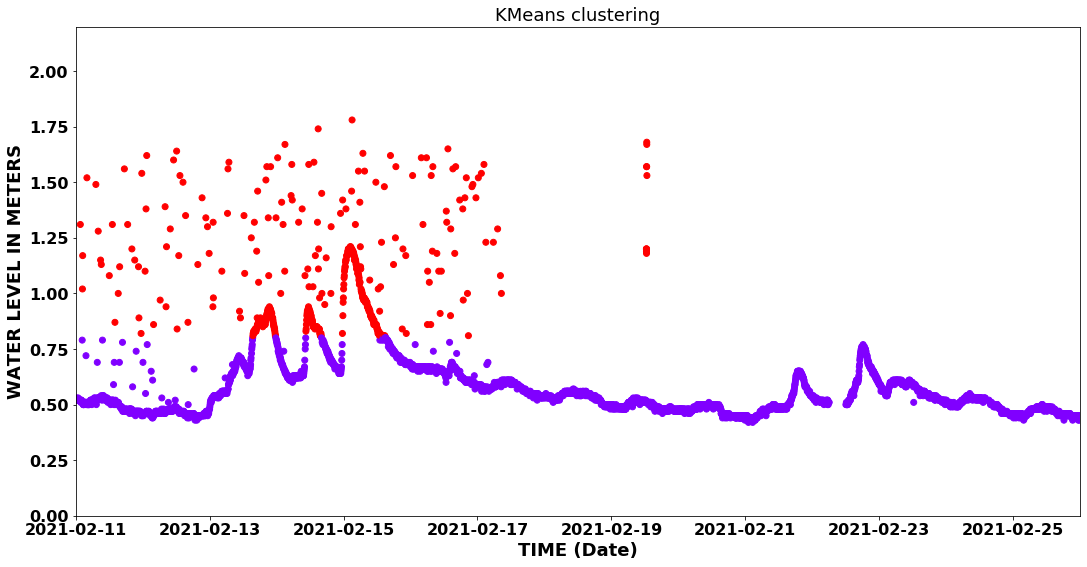

In [9]:
num_of_clusters =2 # number of clusters
water_level_pred = KMeans(n_clusters = num_of_clusters, random_state = 123).fit(water_level_array) # fitting the data
plt.scatter(df['time'],water_level_array, c=water_level_pred.labels_, cmap='rainbow') # plotting
plt.title('KMeans clustering', fontsize=18)
plt.xlabel('TIME (Date)', fontsize=18, weight = 'bold')
plt.ylabel('WATER LEVEL IN METERS', fontsize=18, weight = 'bold')
plt.xlim(['2021-02-11 00:00:00'],['2021-02-25 23:59:59'])
plt.ylim(0, 2.2)
plt.xticks(fontsize=16, weight = 'bold')
plt.yticks(fontsize=16, weight = 'bold')
plt.rcParams['figure.figsize'] = (18, 9)
plt.show

## 5. NOTE
- Clustering cannot happen to the entire data set because some correct datapoints data points will be discarded if we choose some of the clusters
- What to do: cluster a shorter window of datapoints e.g a day and the stich the data frames together
- Below is the clustering of the 12th of Feb 2021

In [36]:
# Retrieve the data on 12th of Feb 2021
df_12th = df.set_index('time')
df_12th_retrieved = df_12th['2021-02-12':'2021-02-12']
df_12th_retrieved = df_12th_retrieved.reset_index()

<function matplotlib.pyplot.show(*args, **kw)>

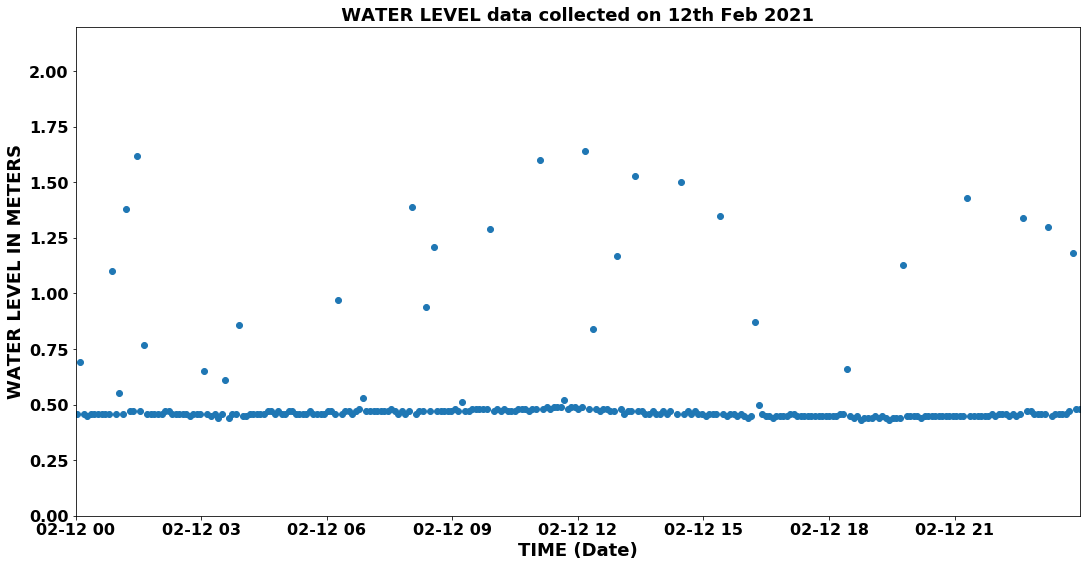

In [37]:
df_12th_retrieved[['time']] = df_12th_retrieved[['time']].apply(pd.to_datetime)
plt.scatter(df_12th_retrieved['time'],df_12th_retrieved['Data'])
plt.title(' WATER LEVEL data collected on 12th Feb 2021 ',weight = 'bold', fontsize=18)
plt.xlabel('TIME (Date)', fontsize=18, weight = 'bold')
plt.ylabel('WATER LEVEL IN METERS', fontsize=18, weight = 'bold')
plt.xlim(['2021-02-12 00:00:00'],['2021-02-12 23:59:59'])
plt.ylim(0, 2.2)
plt.xticks(fontsize=16, weight = 'bold')
plt.yticks(fontsize=16, weight = 'bold')
plt.rcParams['figure.figsize'] = (18, 9)
plt.show

## 5.1 spotting the anomalies 

In [38]:
# silhouette_score is used to evaluate the optimum number of clusters needed for a particular dataset
water_level_array_12th = np.array(df_12th_retrieved['Data']).reshape(-1, 1) # convert the dataframe column to an array and reshape it.
from sklearn.metrics import silhouette_samples, silhouette_score # import silhouette_samples, silhouette_score 
kmax = 10 # set the maximum number of clusters - running iterations
for k in range(2, kmax+1): # for loop to run the iterations and spit out the results
    kmeans = KMeans(n_clusters= k).fit(water_level_array_12th) # Fitting the dataset in Kmeans 
    labels_12th = kmeans.labels_ #Production of cluster labels
    silhouette_avg = silhouette_score(water_level_array_12th, labels_12th, metric = 'euclidean') # euclidean distance from the centre 
    print("For k_clusters =", k, "The average silhouette_score is :", silhouette_avg) # score and cluster
    sample_silhouette_values = silhouette_samples(water_level_array_12th,labels_12th)
    # select the k_clusters with the highest silhoutte_score == Hence k = 2


For k_clusters = 2 The average silhouette_score is : 0.9398092909432363
For k_clusters = 3 The average silhouette_score is : 0.925608641840252
For k_clusters = 4 The average silhouette_score is : 0.9118676081013243
For k_clusters = 5 The average silhouette_score is : 0.915492369164857
For k_clusters = 6 The average silhouette_score is : 0.8993315568549657
For k_clusters = 7 The average silhouette_score is : 0.6407642954905803
For k_clusters = 8 The average silhouette_score is : 0.6419302524320203
For k_clusters = 9 The average silhouette_score is : 0.640926320337628
For k_clusters = 10 The average silhouette_score is : 0.6544039611068553


<function matplotlib.pyplot.show(*args, **kw)>

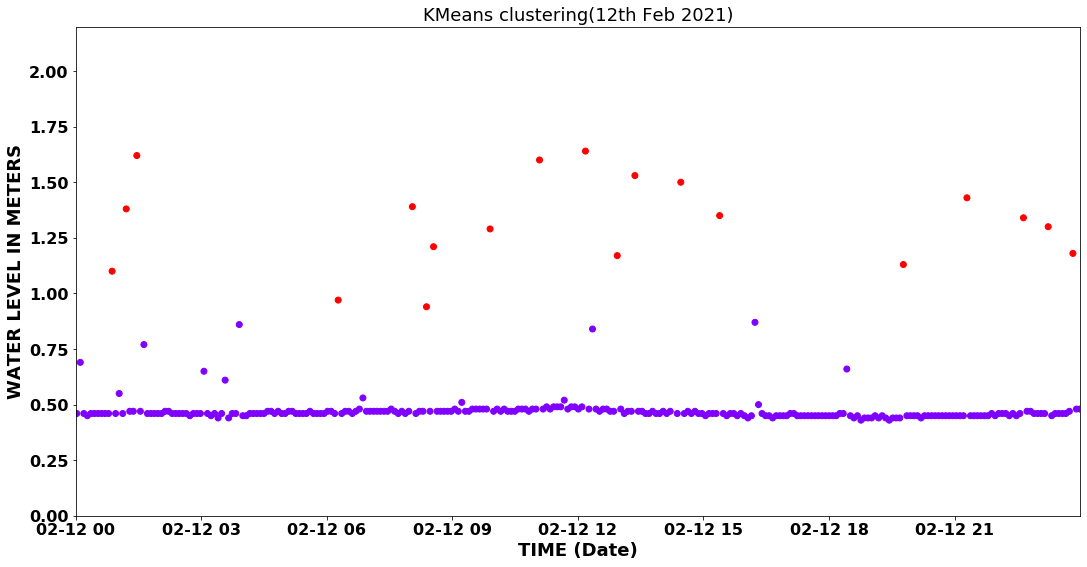

In [39]:
num_of_clusters = 2 # number of clusters
water_level_pred_12th = KMeans(n_clusters = num_of_clusters, random_state = 123).fit(water_level_array_12th) # fitting the data
plt.scatter(df_12th_retrieved['time'],water_level_array_12th, c=water_level_pred_12th.labels_, cmap='rainbow') # plotting
plt.title('KMeans clustering(12th Feb 2021)', fontsize=18)
plt.xlabel('TIME (Date)', fontsize=18, weight = 'bold')
plt.ylabel('WATER LEVEL IN METERS', fontsize=18, weight = 'bold')
plt.xlim(['2021-02-12 00:00:00'],['2021-02-12 23:59:59'])
plt.ylim(0, 2.2)
plt.xticks(fontsize=16, weight = 'bold')
plt.yticks(fontsize=16, weight = 'bold')
plt.rcParams['figure.figsize'] = (18, 9)
plt.show

## 5.2 Getting rid of anomalies 
- From the plot above you can easily spot the anomalies and also follow the water-level trend 
- six clusters to seclude the anomalies

c:\users\folio\anaconda3\envs\dsail2\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


265 0.47120754716981134
19 1.3194736842105264


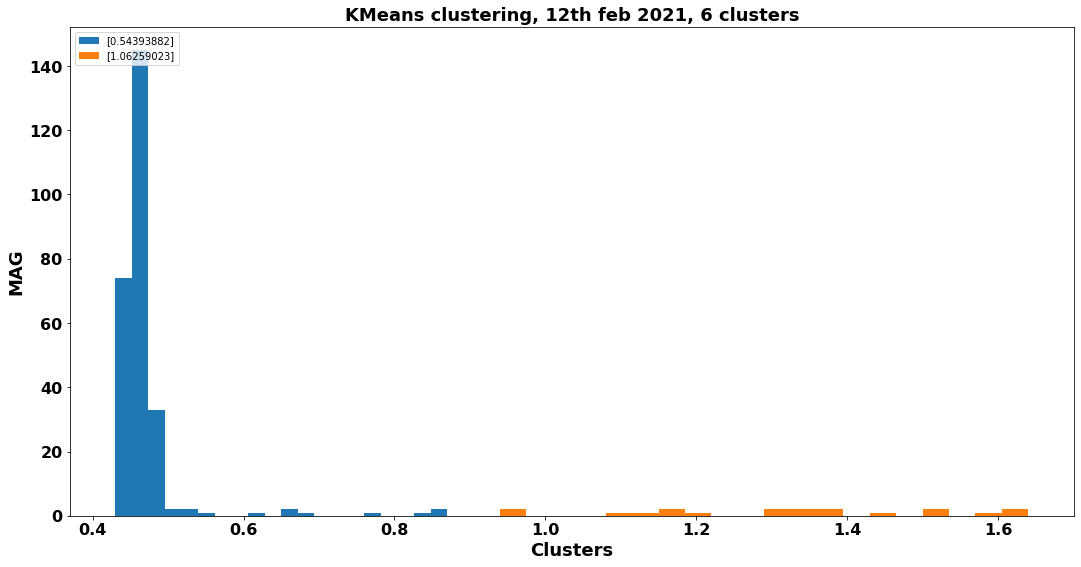

In [40]:
num_of_clusters = 2
water_level_pred2 = KMeans(n_clusters = num_of_clusters, random_state = 123).fit_predict(water_level_array_12th)
plt.figure()
for indx in range (num_of_clusters):
    water_level_clusters = water_level_array_12th[water_level_pred2 == indx]
    plt.hist(water_level_clusters, 20);
    plt.title('KMeans clustering, 12th feb 2021, 6 clusters', fontsize=18, weight = 'bold')
    plt.xlabel('Clusters', fontsize=18, weight = 'bold')
    plt.ylabel('MAG', fontsize=18, weight = 'bold')
    plt.xticks(fontsize=16, weight = 'bold')
    plt.yticks(fontsize=16, weight = 'bold')
    plt.legend(water_level_pred.cluster_centers_, loc="upper left")
    print(len(water_level_clusters), water_level_clusters.mean())

## 6. Clean 12th feb dataset 

<function matplotlib.pyplot.show(*args, **kw)>

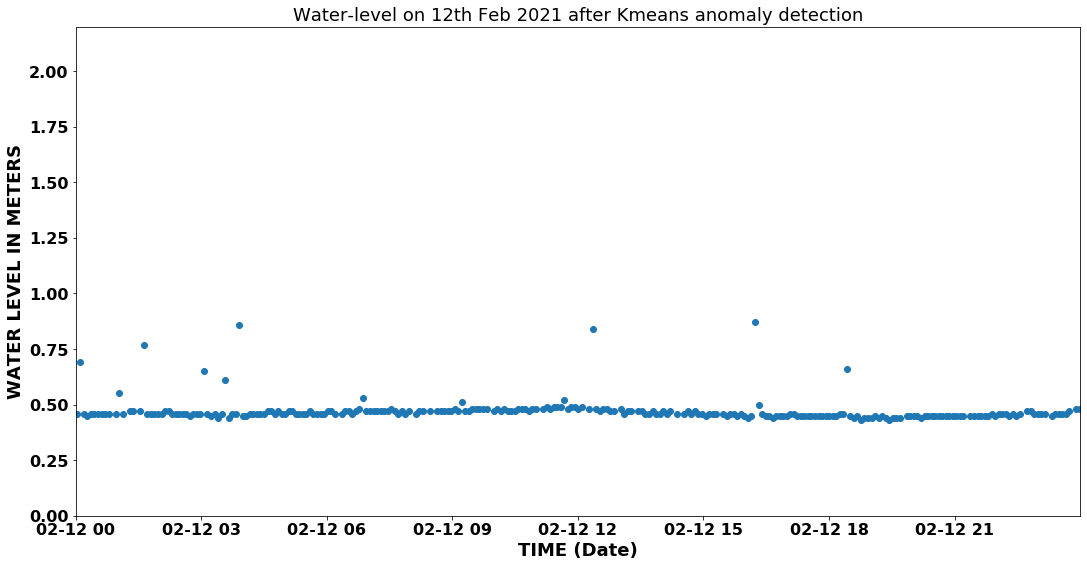

In [16]:
#clean dataset
majority_index = (max(set(list(water_level_pred2)), key = list(water_level_pred2).count))
kmeans_index = list(water_level_pred2)
df_12th_retrieved['kmeans_index'] = kmeans_index
df_clean_12th = df_12th_retrieved.drop(df_12th_retrieved[df_12th_retrieved.kmeans_index != majority_index].index)
df_clean_12th = df_clean_12th.drop(['airtime', 'coding_rate', 'data_rate', 'frequency', 'gateway', 'rssi', 'sensor', 'snr', 'kmeans_index'], axis = 1)

#plotting
plt.scatter(df_clean_12th['time'],df_clean_12th['Data']) # plotting
plt.title('Water-level on 12th Feb 2021 after Kmeans anomaly detection', fontsize=18)
plt.xlabel('TIME (Date)', fontsize=18, weight = 'bold')
plt.ylabel('WATER LEVEL IN METERS', fontsize=18, weight = 'bold')
plt.xlim(['2021-02-12 00:00:00'],['2021-02-12 23:59:59'])
plt.ylim(0, 2.2)
plt.xticks(fontsize=16, weight = 'bold')
plt.yticks(fontsize=16, weight = 'bold')
plt.rcParams['figure.figsize'] = (18, 9)
plt.show

## 7. Calculating the mean 

In [17]:
df_12th_mean = df_clean_12th.groupby(df_clean_12th.time.dt.date).mean()
df_12th_mean

,Data
time,
2021-02-12,0.471208


- This can be done to all  days 

# (B) Comparison with Other Relevant Datasets
- In this section we will compare our water level data with rainfall data from TAHMO
- TAHMO(Trans-African Hydro-Meteorological Observatory (TAHMO))

In [62]:
#read the data
df_watertrend = pd.read_csv('data/muringato-sept.csv')
df_rainfalltrend = pd.read_csv('data/TA00078.csv')

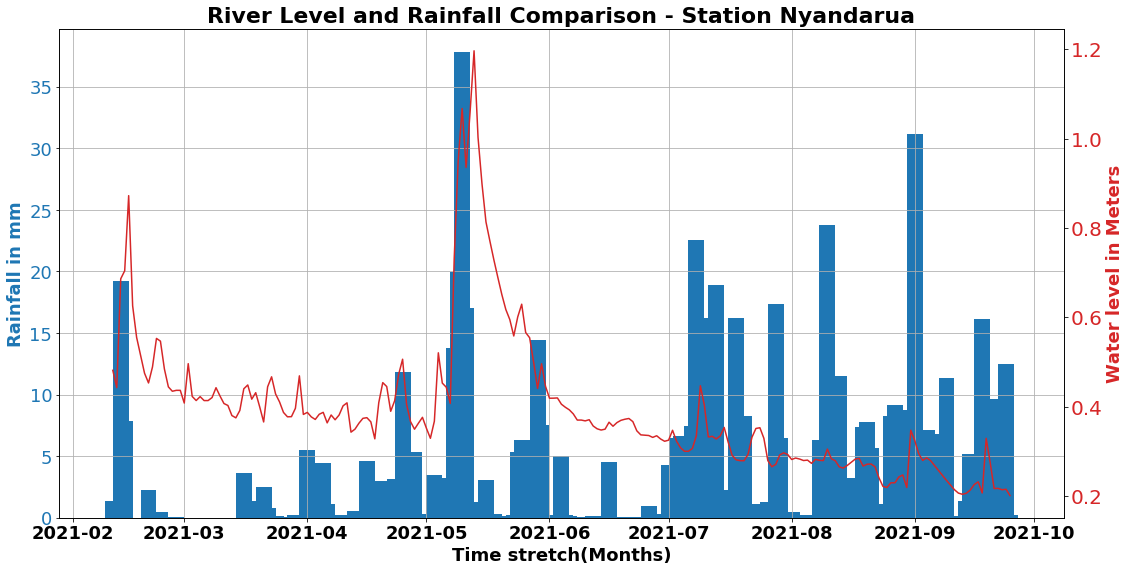

In [63]:
# plotting
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Time (days)')
ax1.set_ylabel('Rainfall (mm)', color=color)  # we already handled the x-label with ax1
ax1.bar(pd.to_datetime(df_rainfalltrend['timestamp (UTC)']), df_rainfalltrend['precipitation (mm)'], color=color, width=4)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True)
ax1.set_xlabel('Time stretch(Months)', fontsize=18, weight = 'bold')
ax1.set_ylabel('Rainfall in mm',fontsize=18, weight = 'bold')
ax1.set_xticklabels(df_rainfalltrend['timestamp (UTC)'], fontsize=10, weight='bold')
ax1.tick_params(axis='y', labelsize=18)
ax1.tick_params(axis='x',which='major', labelsize=18)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('River Level (m)', color=color)
ax2.plot(pd.to_datetime(df_rainfalltrend['timestamp (UTC)']), df_watertrend['Data'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_xlabel('Time stretch(Months)', fontsize=18, weight = 'bold')
ax2.set_ylabel('Water level in Meters',fontsize=18, weight = 'bold')
ax2.tick_params(axis='y', labelsize=20)
#ax1.tick_params(axis='x', rotation=90)
plt.title('River Level and Rainfall Comparison - Station Nyandarua', fontsize=22, weight = 'bold')
#plt.xticks(rotation=90)
plt.show()